Module 9.2: Customized Visualizations using Seaborn

CPE311 Computational Thinking with Python

Submitted by: Mendoza, Paulo

Performed on: 03/28/2023

Submitted on: 03/30/2023

Submitted to: Engr.Roman M. Richard

Procedures:

9.4 Introduction to Seaborn

9.5 Formatting Plots

9.6 Customizing Visualizations


9.4 Introduction to Seaborn

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
fb = pd.read_csv(
 '/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('/content/earthquakes.csv')


In [ ]:
quakes.assign(
 time=lambda x: pd.to_datetime(x.time, unit='ms')
).set_index('time').loc['2018-09-28'].query(
 "parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5"
)


,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


<Axes: xlabel='magType', ylabel='mag'>

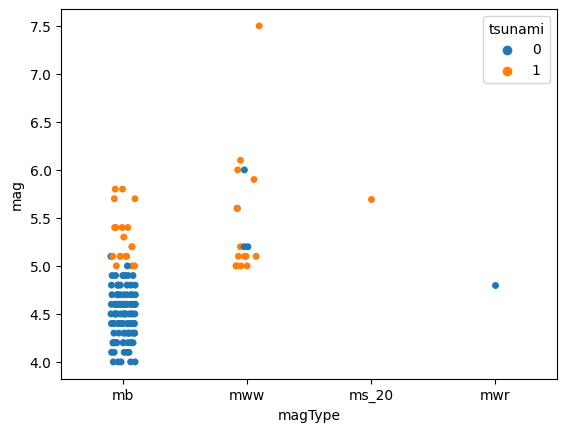

In [ ]:
sns.stripplot(
 x='magType',
 y='mag',
 hue='tsunami',
 data=quakes.query('parsed_place == "Indonesia"')
)


<Axes: xlabel='magType', ylabel='mag'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


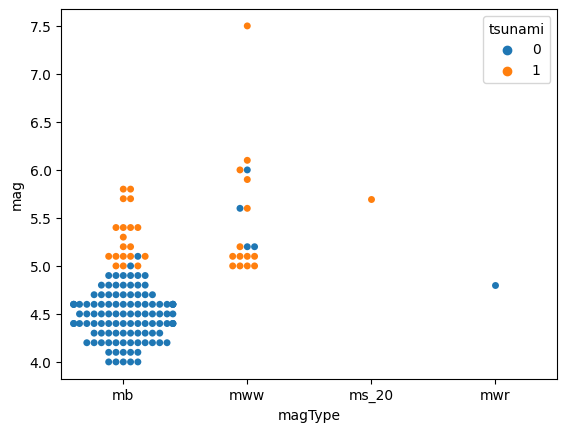

In [ ]:
sns.swarmplot(
 x='magType',
 y='mag',
 hue='tsunami',
 data=quakes.query('parsed_place == "Indonesia"')
)

<Axes: >

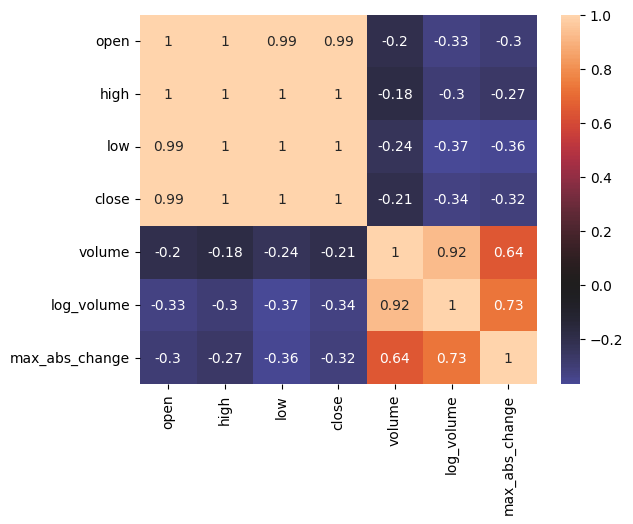

In [ ]:
sns.heatmap(
 fb.sort_index().assign(
 log_volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 ).corr(),
 annot=True, center=0
)

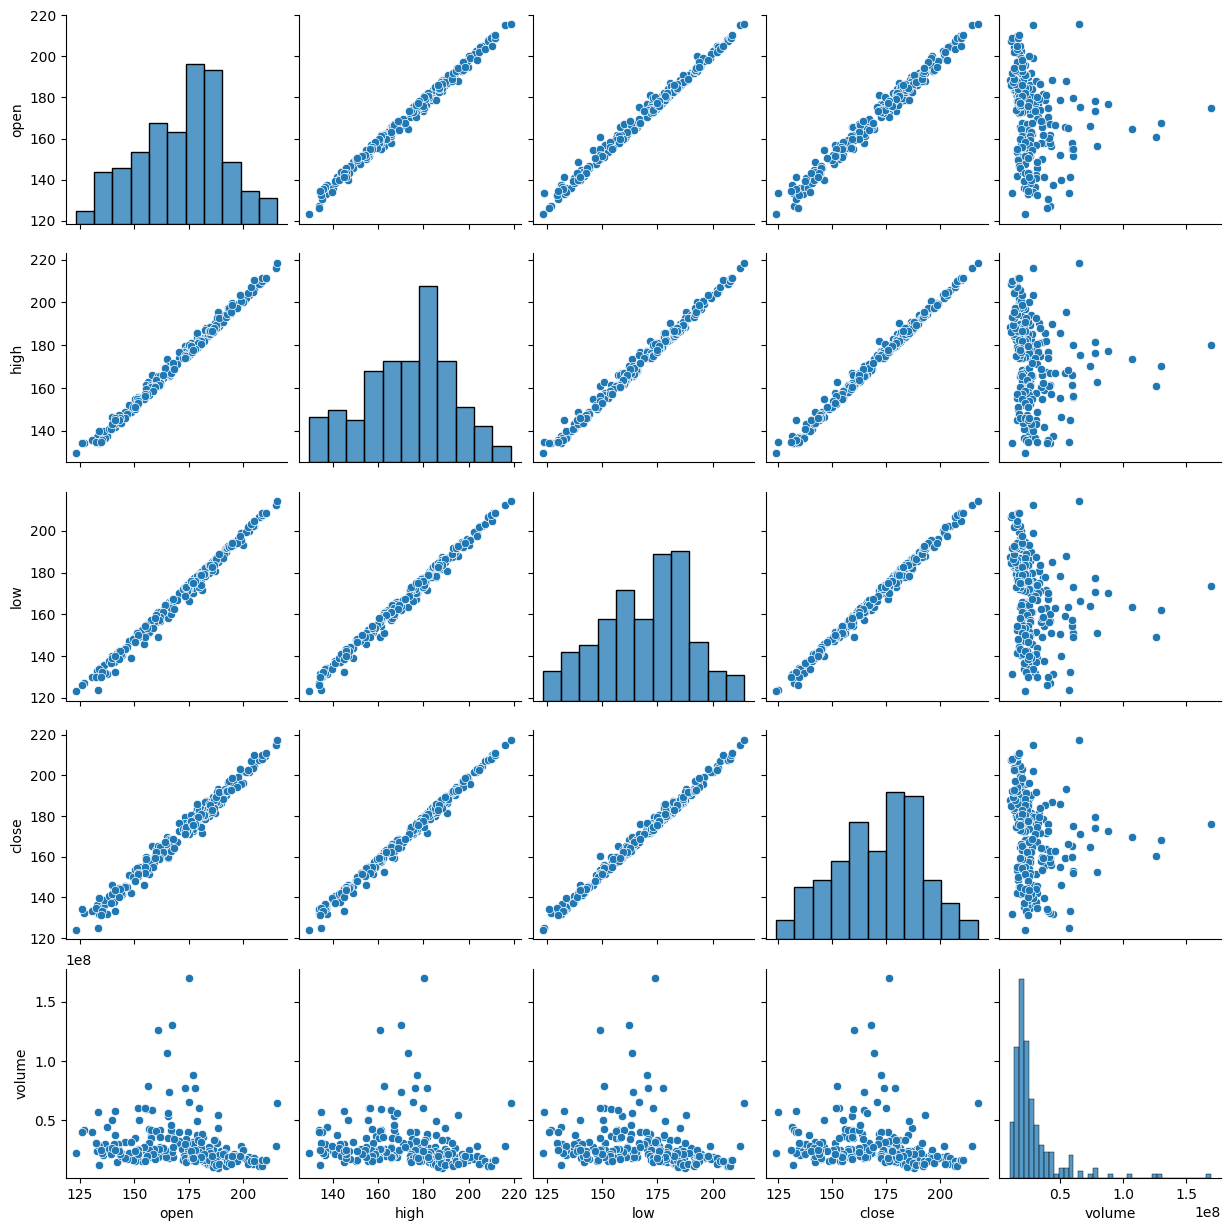

In [ ]:
sns.pairplot(fb)

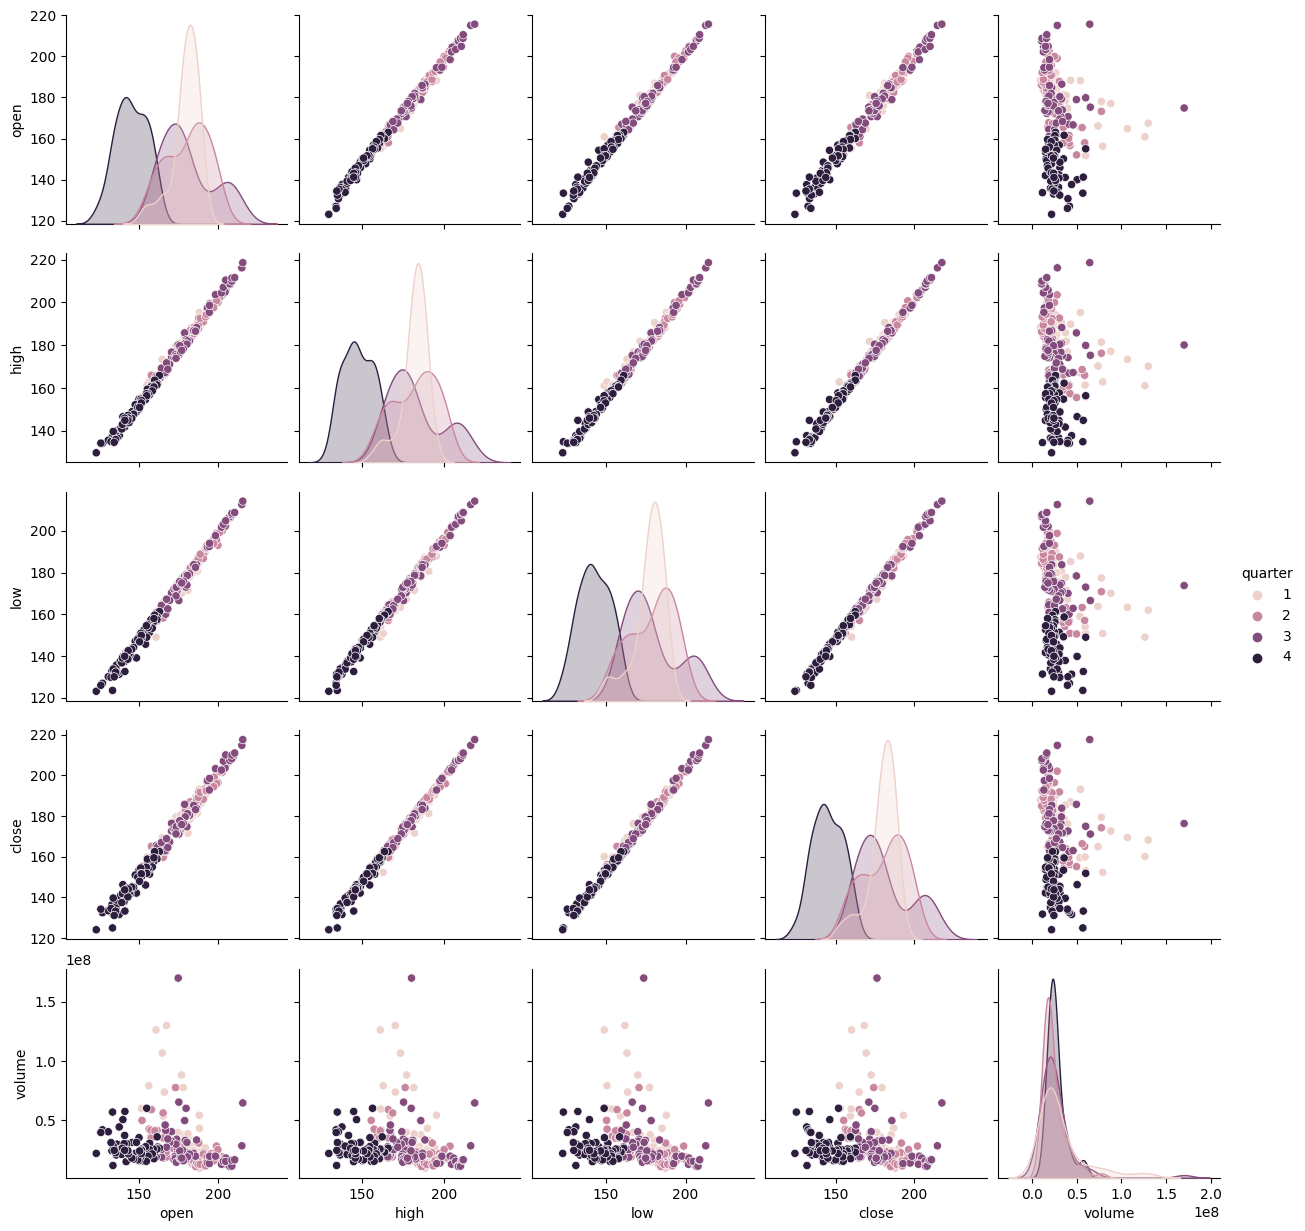

In [ ]:
sns.pairplot(
 fb.assign(quarter=lambda x: x.index.quarter),
 diag_kind='kde',
 hue='quarter'
)

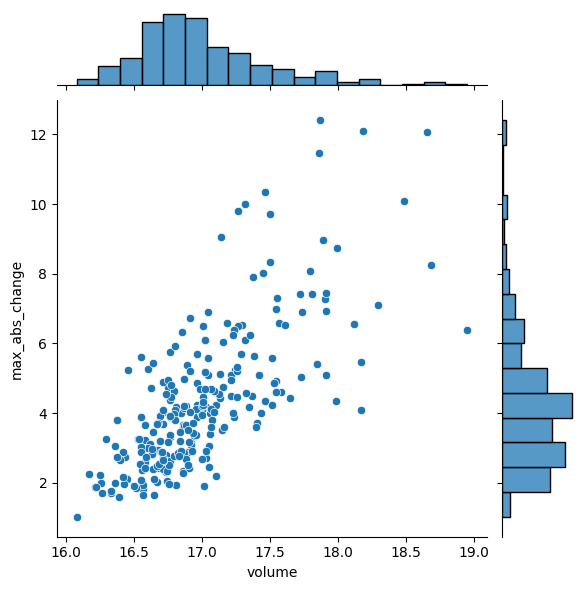

In [ ]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)


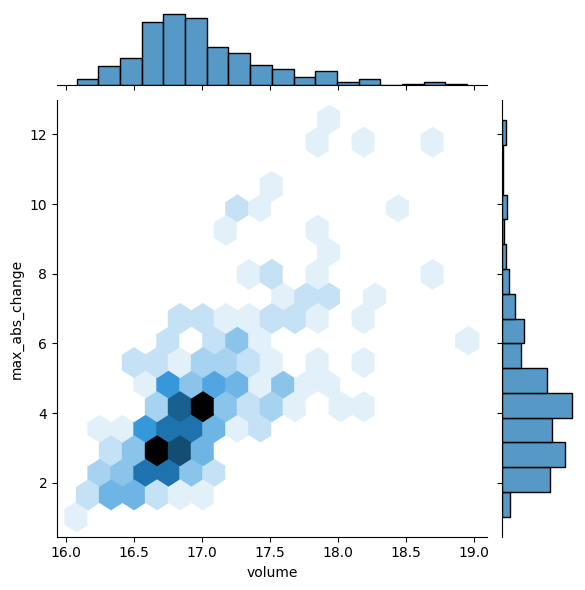

In [ ]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='hex',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)


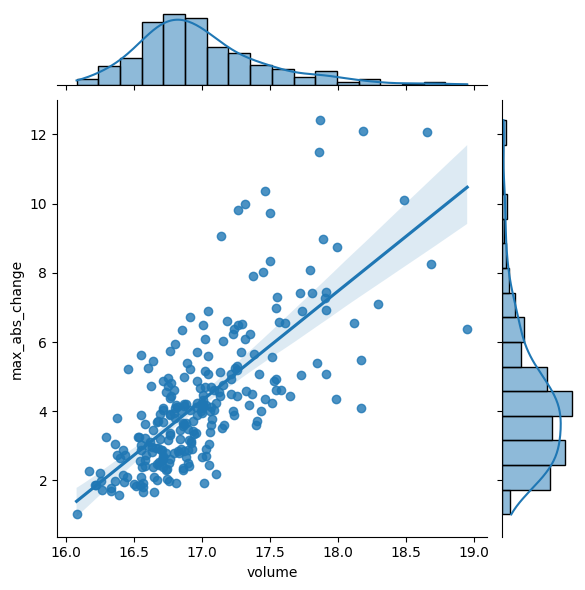

In [ ]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='reg',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

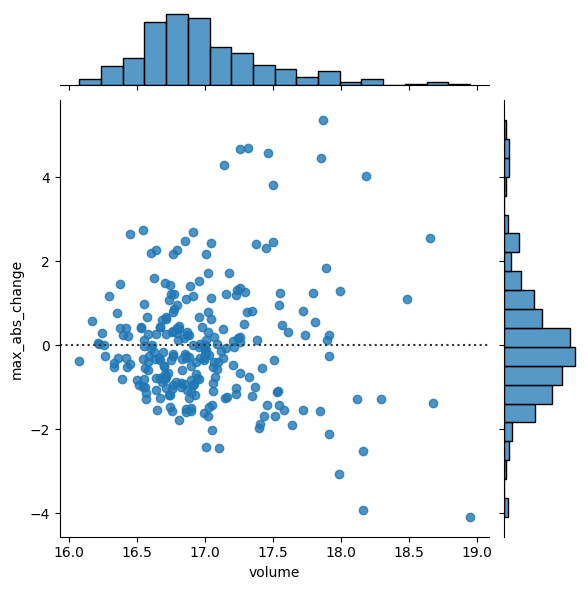

In [ ]:

sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='resid',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)

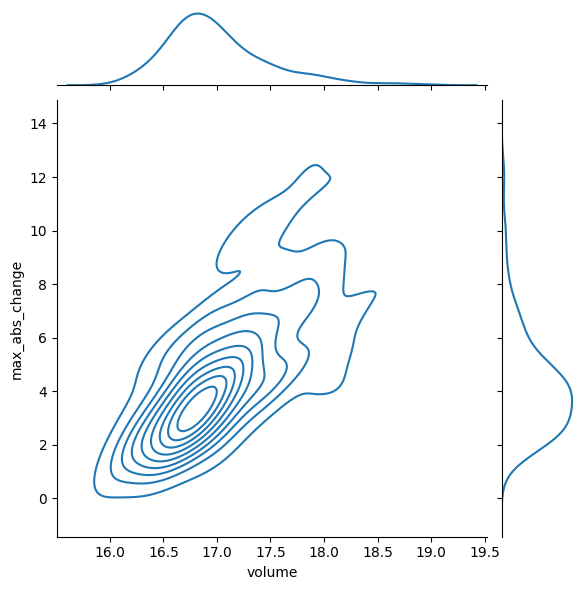

In [ ]:
sns.jointplot(
 x='volume',
 y='max_abs_change',
 kind='kde',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
 )
)


In [ ]:
fb_reg_data = fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low
).iloc[:,-2:]

In [ ]:
import itertools

In [ ]:
iterator = itertools.repeat("I'm an iterator", 1)
for i in iterator:
 print(f'-->{i}')
print('This printed once because the iterator has been exhausted')
for i in iterator:
 print(f'-->{i}')


-->I'm an iterator
This printed once because the iterator has been exhausted


In [ ]:

iterable = list(itertools.repeat("I'm an iterable", 1))
for i in iterable:
 print(f'-->{i}')
print('This prints again because it\'s an iterable:')
for i in iterable:
 print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


In [ ]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
def reg_resid_plots(data):
  """
  Using seaborn, plot the regression and residuals
  plots side-by-side for every permutation of 2 columns
  in the data.
  Parameters:
  - data: A pandas DataFrame
  Returns:
  A matplotlib Figure object.
  """
  num_cols = data.shape[1]
  permutation_count = num_cols * (num_cols - 1)
  fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))
  for (x, y), axes, color in zip(
    itertools.permutations(data.columns, 2),
    ax,
    itertools.cycle(['royalblue', 'darkorange'])
  ):
   for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
    func(x=x, y=y, data=data, ax=subplot, color=color)
  plt.close()
  return fig






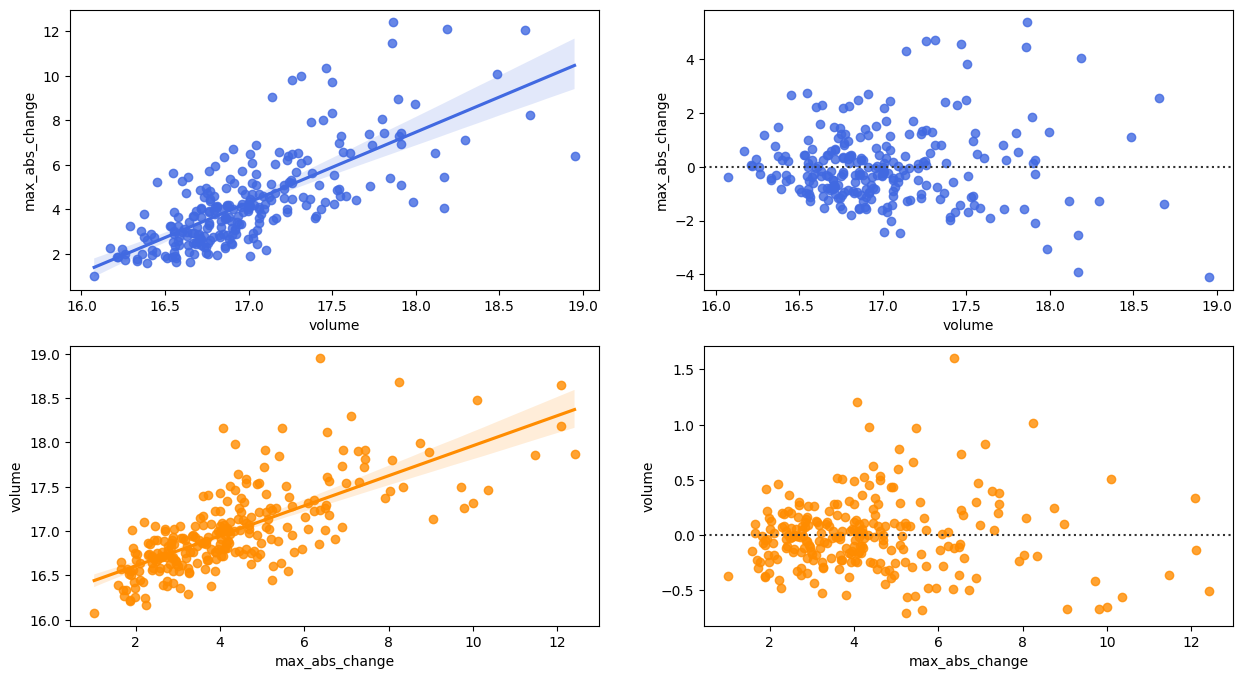

In [ ]:
reg_resid_plots(fb_reg_data)

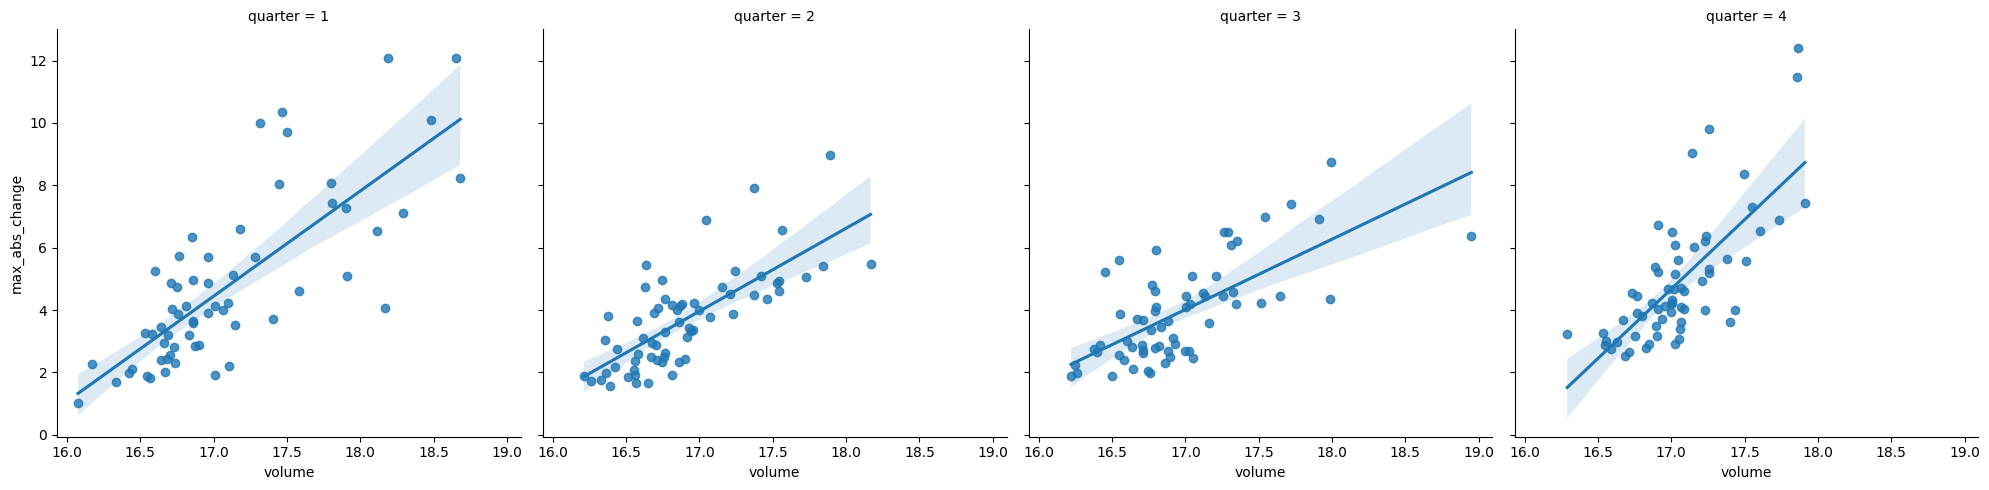

In [ ]:
sns.lmplot(
 x='volume',
 y='max_abs_change',
 data=fb.assign(
 volume=np.log(fb.volume),
 max_abs_change=fb.high - fb.low,
 quarter=lambda x: x.index.quarter
 ),
 col='quarter'
)


Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

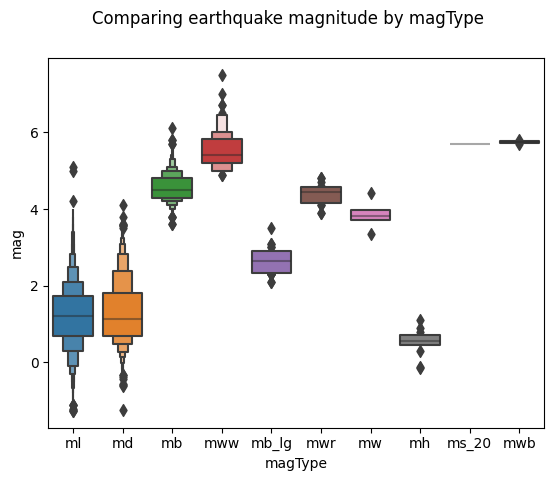

In [ ]:
sns.boxenplot(
 x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

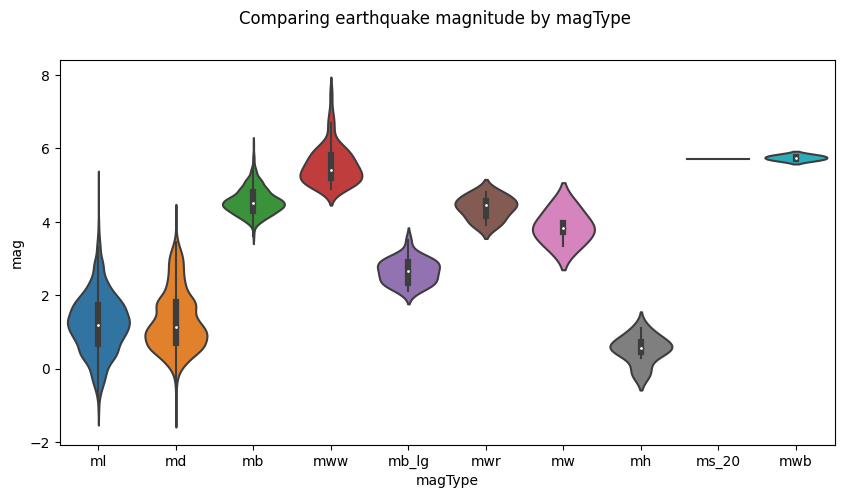

In [ ]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot(
 x='magType', y='mag', data=quakes[['magType', 'mag']],
 ax=axes, scale='width' # all violins have same width
)
plt.suptitle('Comparing earthquake magnitude by magType')


9.5 Formatting Plots

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
fb = pd.read_csv(
 '/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)


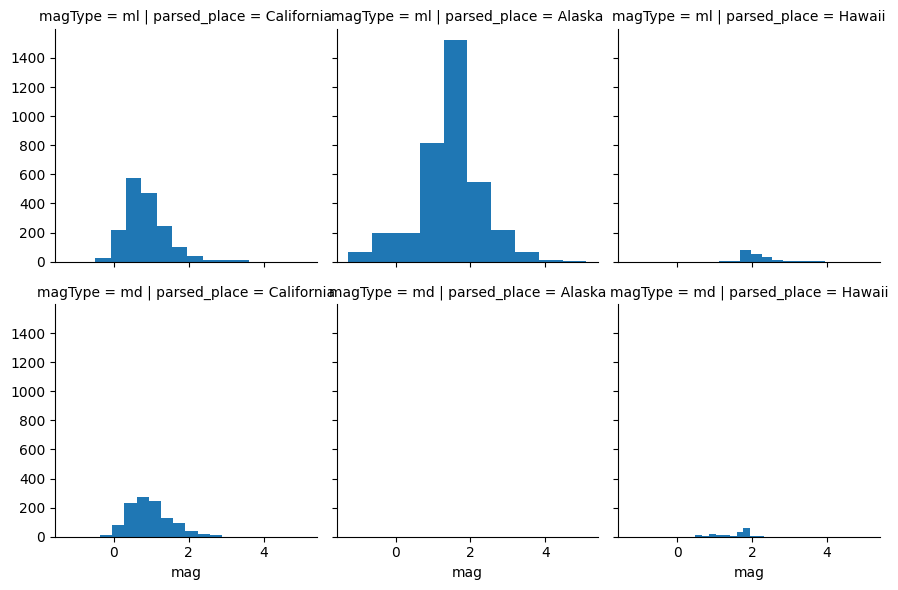

In [ ]:
g = sns.FacetGrid(
 quakes[
 (quakes.parsed_place.isin([
 'California', 'Alaska', 'Hawaii'
 ]))\
 & (quakes.magType.isin(['ml', 'md']))
 ],
 row='magType',
 col='parsed_place'
)
g = g.map(plt.hist, 'mag')


5 Formatting Plots

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
fb = pd.read_csv(
 '/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)


Text(0, 0.5, 'price ($)')

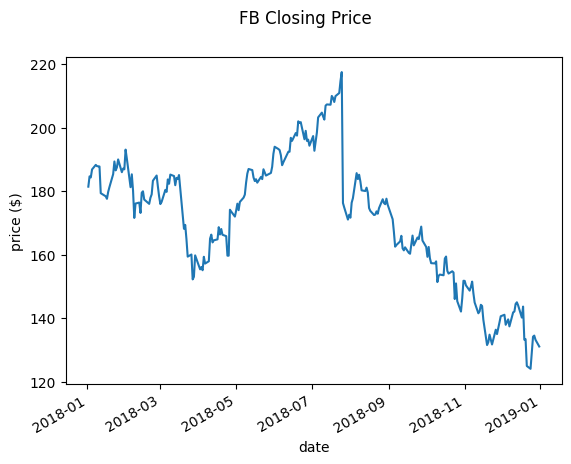

In [ ]:
fb.close.plot()
plt.suptitle('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

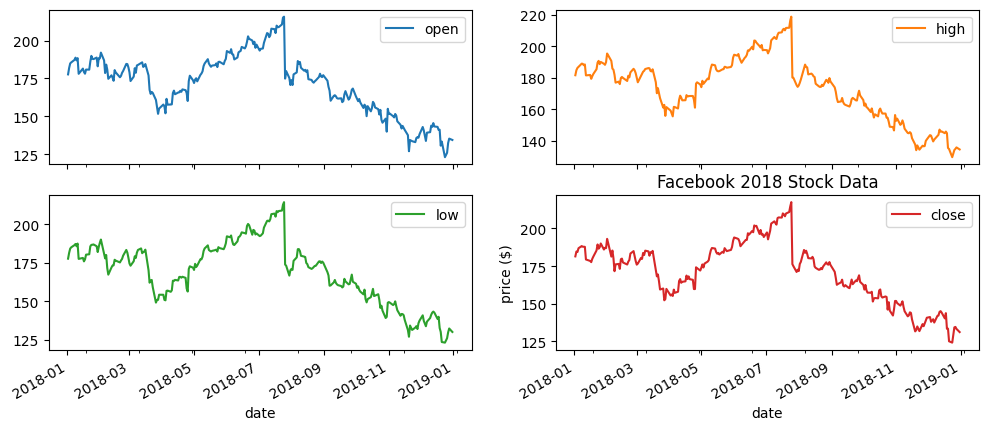

In [ ]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')


Text(0, 0.5, 'price ($)')

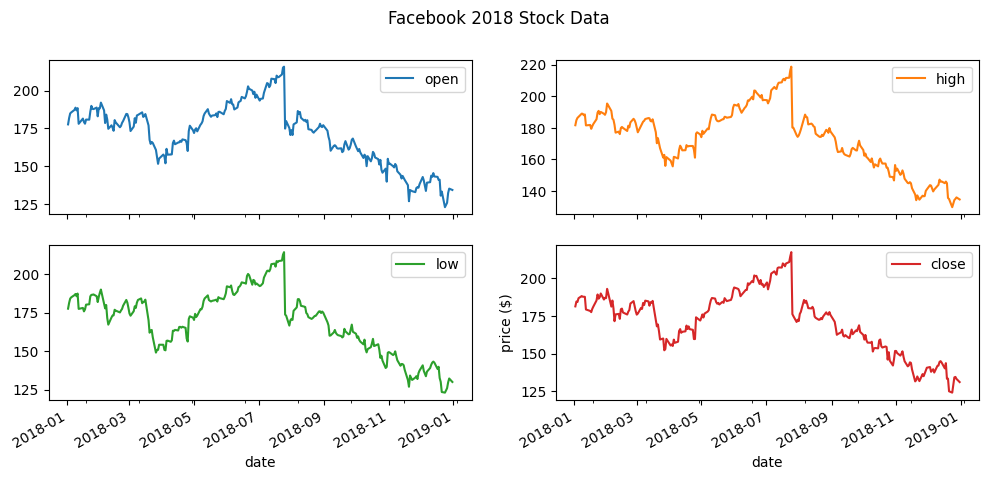

In [ ]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

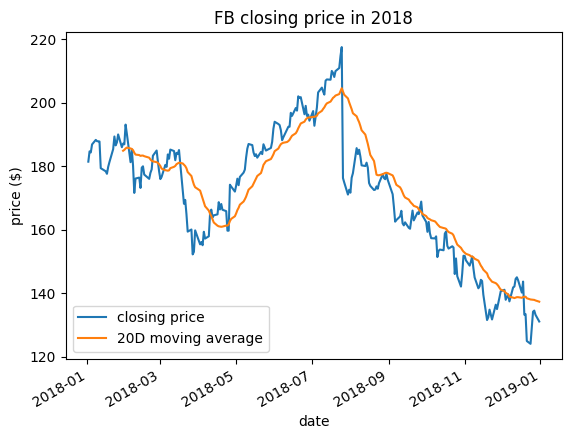

In [ ]:
fb.assign(
 ma=lambda x: x.close.rolling(20).mean()
).plot(
 y=['close', 'ma'],
 title='FB closing price in 2018',
 label=['closing price', '20D moving average']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

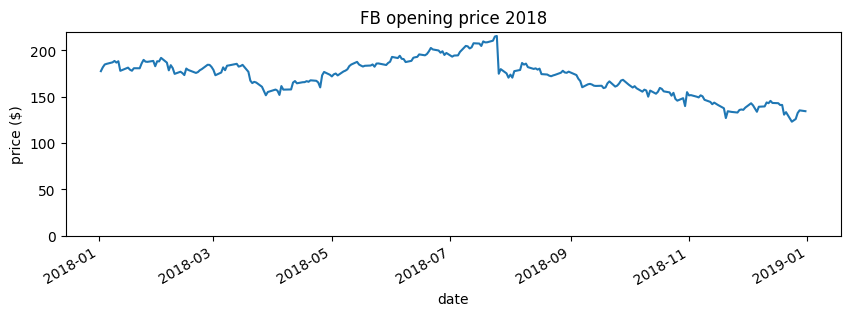

In [ ]:
fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None)
plt.ylabel('price ($)')

ValueError: ignored

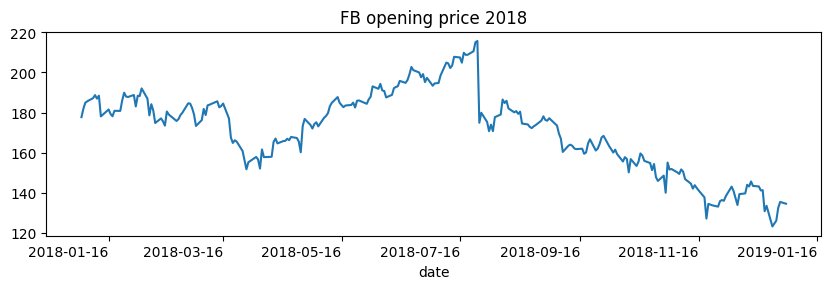

In [ ]:
import calendar
fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks()
plt.xticks(locs + 15 , calendar.month_name[1::2])
plt.ylabel('price ($)')

Text(0, 0.5, 'percent of highest price ($218.62)')

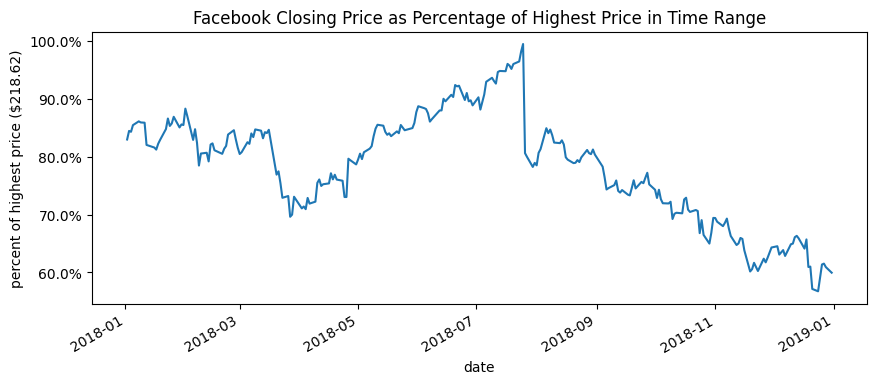

In [ ]:

import matplotlib.ticker as ticker
ax = fb.close.plot(
 figsize=(10, 4),
 title='Facebook Closing Price as Percentage of Highest Price in Time Range'
)
ax.yaxis.set_major_formatter(
 ticker.PercentFormatter(xmax=fb.high.max())
)
ax.set_yticks([
 fb.high.max()*pct for pct in np.linspace(0.6, 1, num=5)
]) # show round percentages only (60%, 80%, etc.)
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')



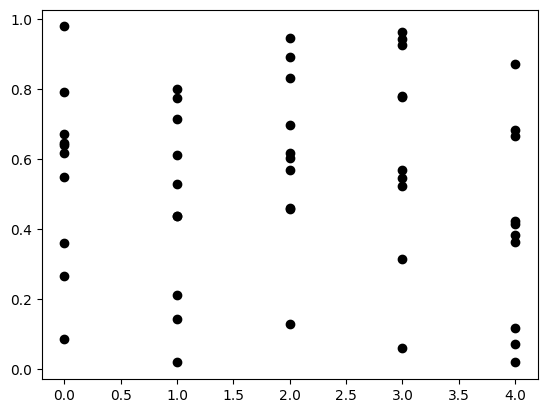

In [ ]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')


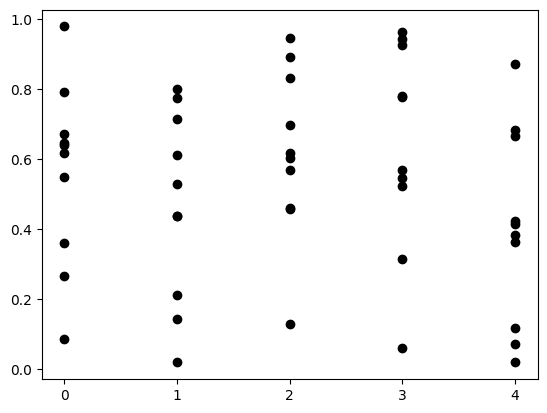

In [ ]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(
 ticker.MultipleLocator(base=1)
)

Data Analysis:

9.4 Introduction to Seaborn

We were introduced to seaborn which is like pandas's plotting package. There is an equivalent of what panda's plooting package can do in Seaborn but there are also some additional features and additional graphing customizations.


9.5 Formatting Plots

We were able to learn additional skills in graph making. Like customizing legends which are the guides on the lines, bars, points, and others is all about. As well as customization of titles and values of x and y.

9.6 Customizing Visualizations

same as third topic in 9.1 activity

Supplementary Activity:

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

Text(0.5, 1.01, 'Correlation between earthquake magnitude\nand whether there was a tsunami')

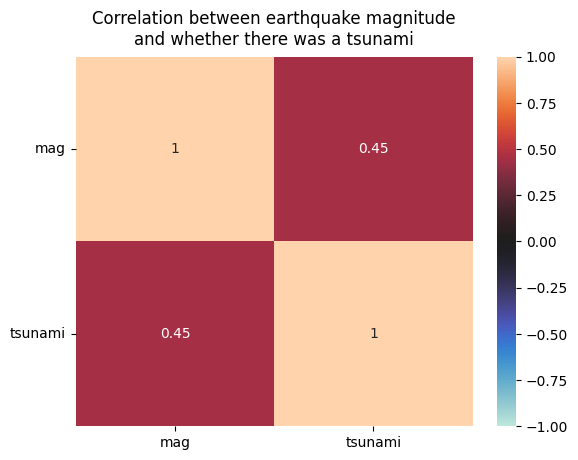

In [ ]:
quakes = pd.read_csv('/content/earthquakes.csv')

sns.heatmap(
    quakes.query('magType == "mb"')[['mag','tsunami']].corr(),
    annot=True, center=0, vmin=-1, vmax=1
)
plt.yticks(rotation=0)
plt.title('Correlation between earthquake magnitude\nand whether there was a tsunami', y=1.01)

2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier.

Text(0.5, 1.1, 'Facebook volume traded and closing price with Tukey Fence bounds')

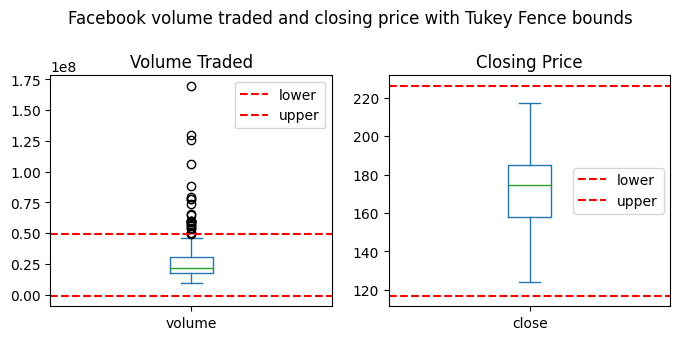

In [ ]:
fb = pd.read_csv('/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

cols = ['volume', 'close']
subset = fb[cols]

quantiles = subset.quantile([0.25, 0.75])
quantiles.loc['iqr',:] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]

axes = subset.plot(kind='box', subplots=True, figsize=(8, 3), title=['Volume Traded', 'Closing Price'])
for ax, col in zip(axes, cols):
    stats = quantiles[col]
    lower = stats.loc[0.25] - 1.5 * stats['iqr']
    upper = stats.loc[0.75] + 1.5 * stats['iqr']
    for bound, name in zip([lower, upper], ['lower', 'upper']):
        ax.axhline(
            bound,
            color='red',
            linestyle='dashed',
            label=name
        )
        ax.legend()
plt.suptitle('Facebook volume traded and closing price with Tukey Fence bounds', y=1.1)

3. Fill in the area between the bounds in the plot from exercise #2.

Text(0.5, 1.1, 'Facebook volume traded and closing price with Tukey Fence bounds')

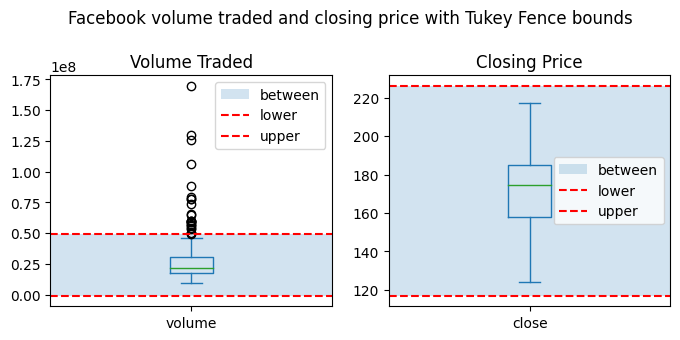

In [ ]:
fb = pd.read_csv('/content/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

cols = ['volume', 'close']
subset = fb[cols]

quantiles = subset.quantile([0.25, 0.75])
quantiles.loc['iqr',:] = quantiles.loc[0.75,:] - quantiles.loc[0.25,:]

axes = subset.plot(kind='box', subplots=True, figsize=(8, 3), title=['Volume Traded', 'Closing Price'])
for ax, col in zip(axes, cols):
    stats = quantiles[col]
    lower = stats.loc[0.25] - 1.5 * stats['iqr']
    upper = stats.loc[0.75] + 1.5 * stats['iqr']
    ax.axhspan(lower, upper, alpha=0.2, label='between' )
    for bound, name in zip([lower, upper], ['lower', 'upper']):
        ax.axhline(
            bound,
            color='red',
            linestyle='dashed',
            label=name
        )
        ax.legend()



plt.suptitle('Facebook volume traded and closing price with Tukey Fence bounds', y=1.1)


4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.

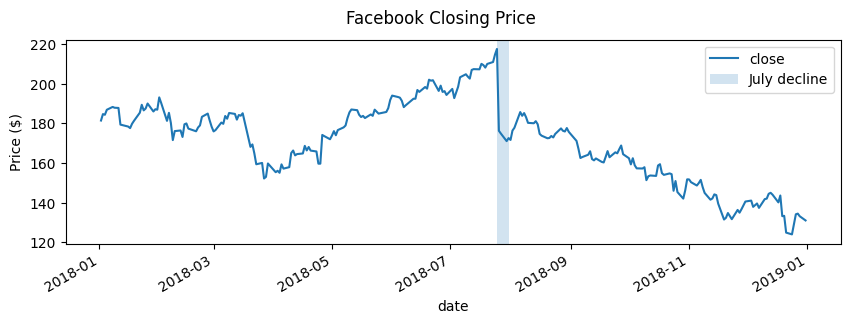

In [ ]:
fb.close.plot(kind='line', figsize=(10, 3))
plt.axvspan(
    '2018-07-25', '2018-07-31', alpha=0.2, label='July decline',
)
plt.ylabel('Price ($)')
plt.suptitle('Facebook Closing Price')
plt.legend()

5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
Disappointing user growth announced after close on July 25, 2018
Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
FTC launches investigation on March 20, 2018

Text(0.5, 0.98, 'Facebook Closing Price')

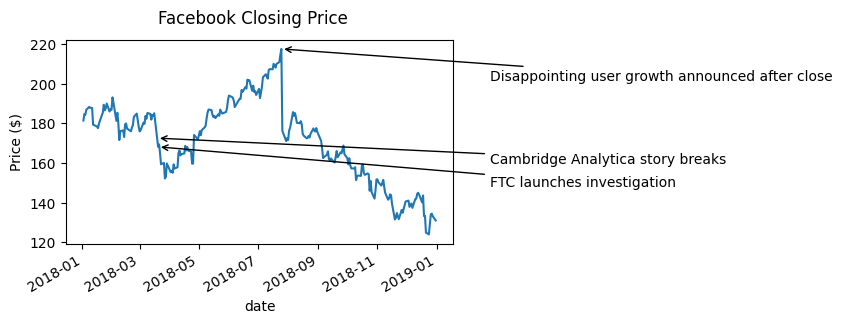

In [ ]:
fb.close.plot(kind='line', figsize=(5, 3))

notes = [
    ('Disappointing user growth announced after close', '2018-07-25'),
    ('Cambridge Analytica story breaks', '2018-03-19'),
    ('FTC launches investigation', '2018-03-20')
]

# for repeatable random jitter
np.random.seed(1)

for text, date in notes:
    y_value = fb.close[date]
    jitter = np.random.uniform(-20, -10, 1)
    plt.annotate(
        text,
        xy=(date, y_value),
        xytext=('2019-02-25', y_value + jitter),
        arrowprops=dict(arrowstyle='->')
    )
plt.ylabel('Price ($)')
plt.suptitle('Facebook Closing Price')

6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [ ]:
import itertools
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
def reg_resid_plots(data):
  """
  Using seaborn, plot the regression and residuals
  plots side-by-side for every permutation of 2 columns
  in the data.
  Parameters:
  - data: A pandas DataFrame
  Returns:
  A matplotlib Figure object.
  """
  num_cols = data.shape[1]
  permutation_count = num_cols * (num_cols - 1)
  fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))
  for (x, y), axes, color in zip(
    itertools.permutations(data.columns, 2),
    ax,
    [cm.Pastel1(i) for i in range(len(ax))]
  ):
    for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
      func(x=x, y=y, data=data, ax=subplot, color=color)
  plt.close()
  return fig

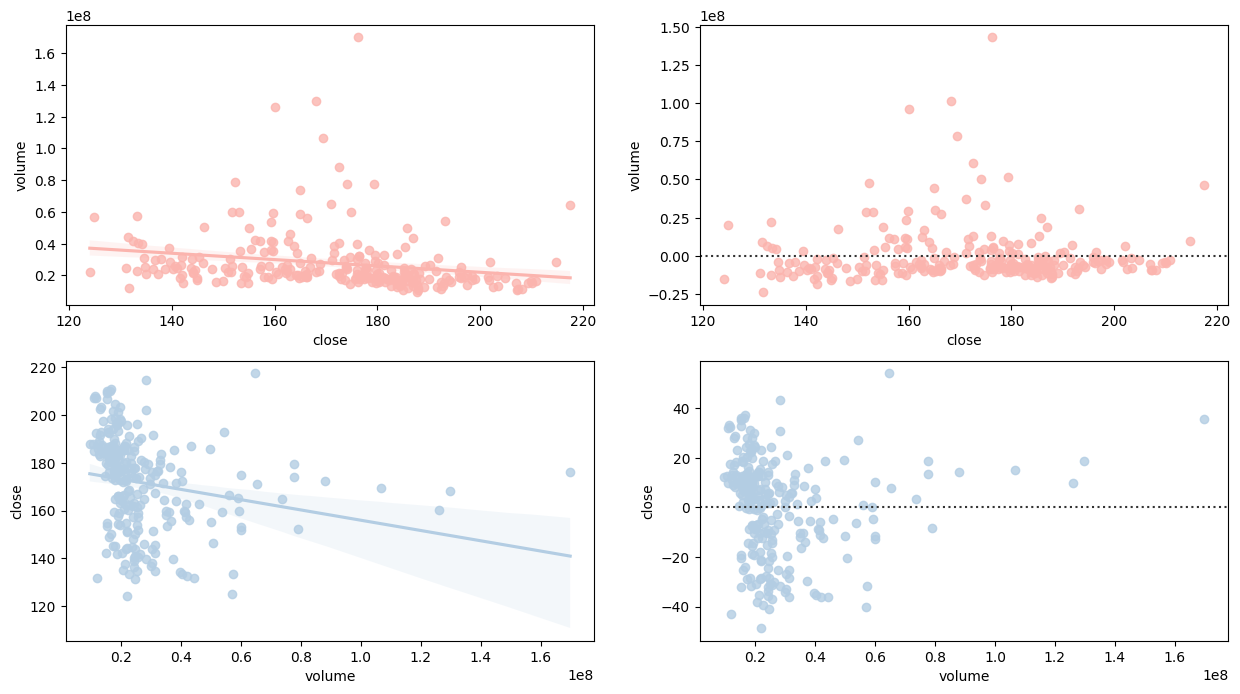

In [ ]:
reg_resid_plots(fb[['close', 'volume']])

Summary/Conclusion:

I was able to learn about Seaborn with is a great package for more customization in graph making. I learned about setting legends, fill colors, arrow annotation, and more. Which are all useful thinks to make in a graph because before we only have the basic graph and minimum labels. But now we can guide users more on the focus of the data or the span which we are highlighting.